In [2]:
import torch
import numpy as np

# Checking GPU Availability
is_gpu_available = torch.cuda.is_available()
# Returns a bool indicating if CUDA is currently available.

print(torch.cuda.is_available())
if not is_gpu_available:
    print("Training on CPU, cuda unavailable")
else:
    print("Training on GPU")
    
print(torch.cuda.device_count())    
# Returns the number of GPUs available.

True
Training on GPU
1


In [3]:
# conda install pytorch torchvision cudatoolkit=10.1 -c pytorch
# pip3 install torch torchvision
# sudo rmmod nvidia_uvm
# sudo rmmod nvidia
# sudo modprobe nvidia
# sudo modprobe nvidia_uvm

In [4]:
# CIFAR10 Dataset
"""The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 
classes, with 6000 images per class. There are 50000 training images 
and 10000 test images.
The dataset is divided into five training batches and one test batch,
each with 10000 images. The test batch contains exactly 1000 randomly-
selected images from each class. The training batches contain the 
remaining images in random order, but some training batches may contain
more images from one class than another. Between them, the training 
batches contain exactly 5000 images from each class."""

# Classes
"""airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
"""

'airplane\nautomobile\nbird\ncat\ndeer\ndog\nfrog\nhorse\nship\ntruck\n'

In [5]:
from torchvision import datasets
import torchvision.transforms as transforms

# Transforms:
"""Transforms are common image transformations. They can be chained 
together using Compose. So, all transforms in transforms.Compose are
applied to input one by one.

Train transforms:
1) transforms.RandomRotation(15): Rotate image by angle; -15 to 15.

2) transforms.RandomHorizontalFlip(p): Horizontally flip the given PIL
Image randomly with a given probability. default p is 0.5

3) transforms.ToTensor(): This converts input image to PyTorch tensor.

4) transforms.Normalize()):Normalize tensor image with mean and 
standard deviation. Given mean: (M1,...,Mn) and std: (S1,..,Sn) for n 
channels, this transform will normalize each channel of the input torch
.*Tensor i.e. 
input[channel] = (input[channel] - mean[channel]) / std[channel]

"""

'Transforms are common image transformations. They can be chained \ntogether using Compose. So, all transforms in transforms.Compose are\napplied to input one by one.\n\nTrain transforms:\n1) transforms.RandomRotation(15): Rotate image by angle; -15 to 15.\n\n2) transforms.RandomHorizontalFlip(p): Horizontally flip the given PIL\nImage randomly with a given probability. default p is 0.5\n\n3) transforms.ToTensor(): This converts input image to PyTorch tensor.\n\n4) transforms.Normalize()):Normalize tensor image with mean and \nstandard deviation. Given mean: (M1,...,Mn) and std: (S1,..,Sn) for n \nchannels, this transform will normalize each channel of the input torch\n.*Tensor i.e. \ninput[channel] = (input[channel] - mean[channel]) / std[channel]\n\n'

In [6]:
# transforms.RandomHorizontalFlip() works on PIL.Images, not 
# torch.Tensor. So apply transforms.ToTensor() after
# transforms.RandomHorizontalFlip().

# Pil image
"""Python Imaging Library (abbreviated as PIL) (in newer versions known
as Pillow) is a free library for the Python programming language that 
adds support for opening, manipulating, and saving many different image
file formats."""

transform = transforms.Compose([transforms.RandomRotation(15),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5),
                                                   (0.5, 0.5, 0.5))])

train_data = datasets.CIFAR10('data', train=True, download=True,
                             transform=transform)
# 'data'- Root directory of dataset where directory cifar-10-batches-py
# exists or will be saved to if download is set to True.

# train - If True, creates dataset from training set, otherwise creates 
# from test set.

# download -  If true, downloads the dataset from the internet and puts
# it in root directory. If dataset is already downloaded, it is not 
# downloaded again.

test_data = datasets.CIFAR10('data',train=False, download=True,
                             transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [7]:
# print(type(train_data))

In [8]:
# Separating the validation data
num_train_data = len(train_data)
ind = list(range(num_train_data))
np.random.shuffle(ind)
validation_size = 0.2

split_ind = int(np.floor(num_train_data*validation_size))
train_ind, validation_ind = ind[split_ind:], ind[:split_ind]

from torch.utils.data.sampler import SubsetRandomSampler
train_sampler = SubsetRandomSampler(train_ind)
validation_sampler = SubsetRandomSampler(validation_ind)
# torch.utils.data.SubsetRandomSampler(indices) - Samples elements 
# randomly from a given list of indices, without replacement.


from torch.utils.data import DataLoader
# dataloaders
train_loader = DataLoader(train_data, batch_size=32 ,
                          sampler=train_sampler, drop_last=True)
validation_loader = DataLoader(train_data, batch_size=32 ,
                          sampler=validation_sampler, drop_last=True)
test_loader = DataLoader(test_data, batch_size=32, drop_last=True)

# batch_size - how many samples per batch to load (default: 1).

# sampler - defines the strategy to draw samples from the dataset. If
# specified, shuffle must be False.  

# drop_last (bool, optional) – set to True to drop the last incomplete
# batch, if the dataset size is not divisible by the batch size. If 
# False and the size of dataset is not divisible by the batch size, 
# then the last batch will be smaller. (default: False)

# print(type(train_sampler))
# print(type(train_loader))
# <class 'torch.utils.data.sampler.SubsetRandomSampler'>
# <class 'torch.utils.data.dataloader.DataLoader'>

target_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# Provided you are running IPython, the %matplotlib inline will make 
# your plot outputs appear and be stored within the notebook.

def display_image(image):
    image = image/2 +0.5 # unnormalize
    # print(type(image), type(np.transpose(image, (1, 2, 0))))
    # numpy.ndarray
    
    plt.imshow(np.transpose(image, (1, 2, 0))) 
    # image - array, (1,2,0) - axes
    # convert from tensor to image

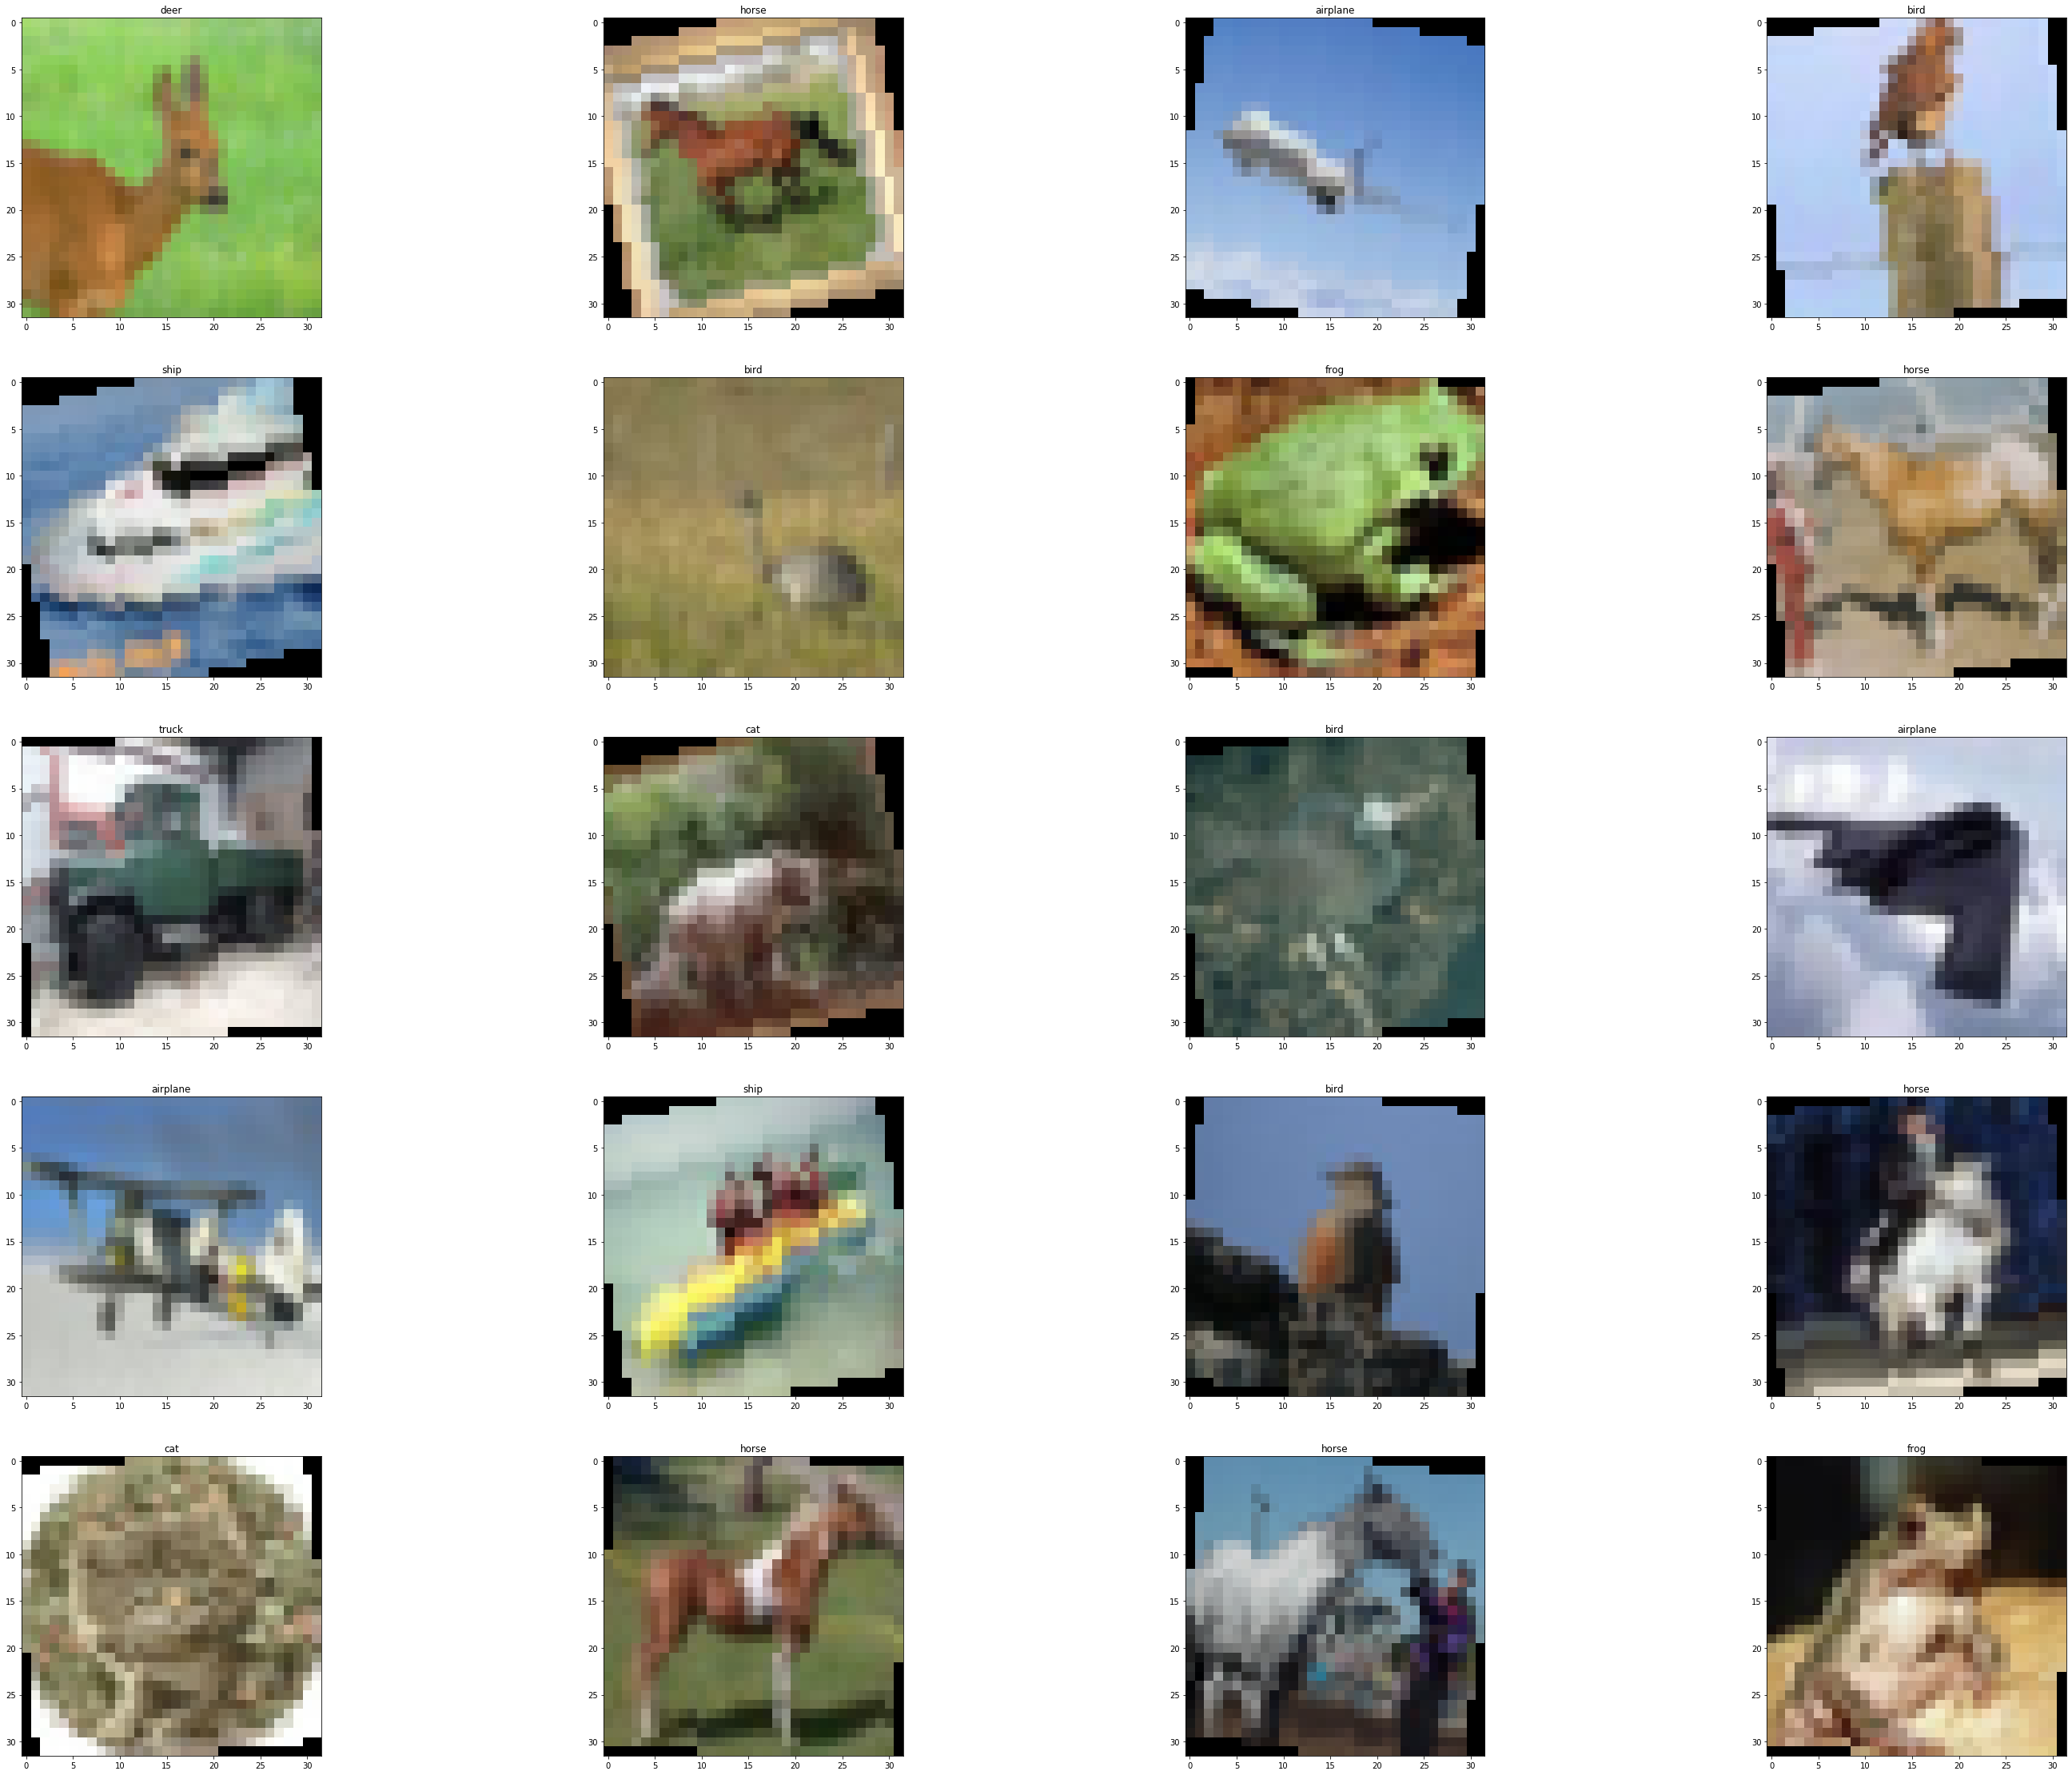

In [10]:
dataiter = iter(train_loader)
# print(type(dataiter))
# <class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>

images, labels = dataiter.next()
# print(type(images), type(labels))
# <class 'torch.Tensor'> <class 'torch.Tensor'>

# For displaying image it need to be converted to numpy
# Converting torch tensor to numpy array
images = images.numpy()
fig = plt.figure(figsize=(50,40))
# figsize(width, height) - in inches. If not provided,default: [6.4, 4.8]) = [6.4, 4.8].

for ind in range(20):
    plot = fig.add_subplot(5, 20/5, ind+1)
    # fig.add_subplot(no of rows, col, index)
    display_image(images[ind])
    plot.set_title(target_classes[labels[ind]])

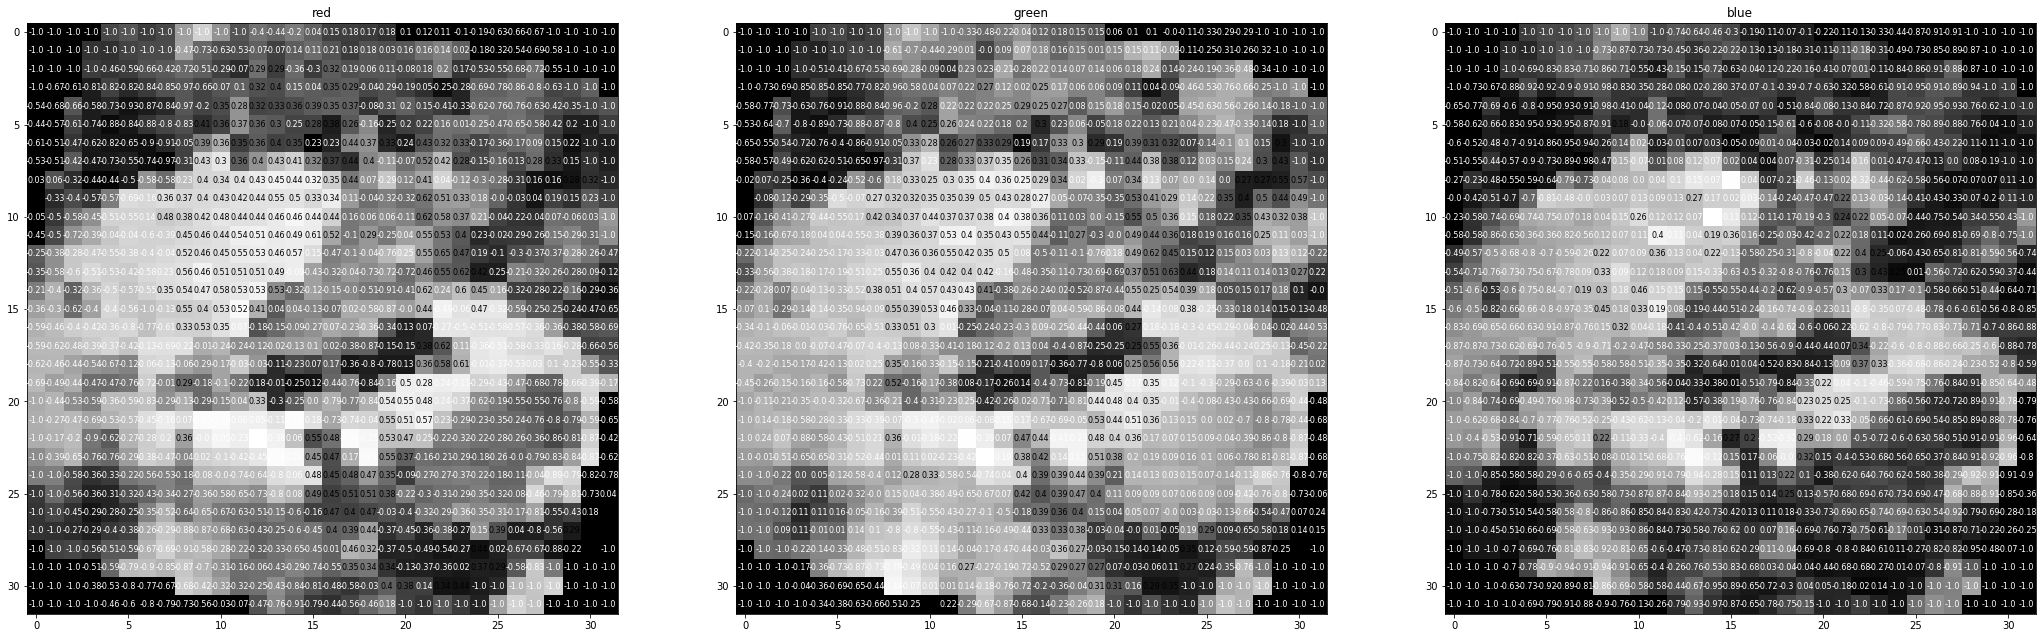

In [11]:
# displaying the normalized rgb color channels as 3 separate grayscale
# intensity images
rgb_image = np.squeeze(images[9])
# Remove single-dimensional entries from the shape of an array.

# print(rgb_image,type(rgb_image)) #<class 'numpy.ndarray'>
channels = ['red', 'green', 'blue']

fig = plt.figure(figsize = (36, 36))

for ind in np.arange(rgb_image.shape[0]):
    plot = fig.add_subplot(1, 3, ind+1)
    image = rgb_image[ind]
    # print(image.shape) # (32,32)
    plot.imshow(image, cmap='gray')
    plot.set_title(channels[ind])
    width, height = image.shape
    thresh = image.max()/2.5
    
    for x in range(width):
        for y in range(height):
            value = round(image[x][y],2) if image[x][y] !=0 else 0
            plot.annotate(s = str(value), xy=(x, y),
                    horizontalalignment='center',
                    verticalalignment='center', size=8,
                    color='white' if image[x][y]<thresh else 'black')
# plot.annotate() - Annotate the point xy with text text. In simplest 
# form, text is placed at xy.         
# str(value) - test of annotation
# xy - point(x, y) to annotate
            

In [11]:
# Model definition
import torch.nn as nn
import torch.nn.functional as F

# CNN architecture
class Network(nn.Module):
    # nn.Module - Base class for all neural network modules.
    # Your models should also subclass this class.
    
    def __init__(self):
        # The __init__ method is similar to constructors in C++ and 
        # Java. Constructors are used to initialize the object’s state. 
        # The task of constructors is to initialize(assign values) to 
        # data members of the class when an object of class is created.
        
        super(Network, self).__init__()
        # super() provides the access to those methods of the super-
        # class (parent class) which have been overridden in a sub-
        # class (child class) that inherits from it.
        # The super() builtin returns a proxy object (temporary object
        # of the superclass) that allows us to access methods of the 
        # base class.
        
        
        # input to this conv layer (32*32*3 image tensor)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        # Applies a 2D convolution over an input signal composed of 
        # several input planes.
        
        # in_channels is number of channels of input to convolutional 
        # layer. So, for example, in case of convolutional layer that 
        # applies to image, in_channels refers to number of channels of
        # image. In case of RGB image, in_channels == 3 (red, green and
        # blue); in case of a gray image, in_channels == 1.

        # out_channels is number of feature maps, which is often 
        # equivalent to number of kernels that you apply to input.
        
        # input to this conv layer is (16*16*16 image tensor)
        # (h,w) from prev conv layer output were 32,32 then due to max
        # pooling layer- (h,w) - (32/2,32/2); depth=16 prev conv no of
        # feature kernels
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        
        # input (8*8*32 tensor)
        self.conv3 = nn.Conv2d(64, 32, 3, padding=1)
        
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)
        
        
        # maxpooling layer
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        # Apply max pooling operation, due to stride 2, output has half
        # spatial dimensions as of input but same depth
        
        # fully connected layer
        self.fc1 = nn.Linear(64*4*4, 256)
        # 64*4*4- input features; 500- output features
        
        self.fc2 = nn.Linear(256, 10)
        
        # dropout layer
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        # Applies the rectified linear unit function element-wise.
        # ReLU(x)=max(0,x)
        
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        # sending the tensor to fc layer so flatten the input
        x = x.view(-1, 64*4*4)
        # Returns new tensor with same data as self tensor but of 
        # different shape. The returned tensor shares same data and 
        # must have same number of elements, but may have different 
        # size. For tensor to be viewed, new view size must be 
        # compatible with its original size.
        
        # function of -1-The actual value for this dimension will be inferred 
        # so that number of elements in view matches original number of
        # elements.
        
        
        x = self.dropout(x)
        # 1st hidden layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
model = Network()    
print(model)

# training on GPU
if is_gpu_available:
    print("Training on GPU")
    model.cuda()
    

Network(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)
Training on GPU


In [22]:
# x = torch.randn(4,4)
# print(x, x.size()) # [4,4]
# print(x.view(-1, 8)) # .view is not inplace
# print(x.view(-1, 9)) invalid for input size 16


In [12]:
# Loss Function and Optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
# This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one 
# single class. This is particularly useful when you have an unbalanced
# training set. The input is expected to contain raw, unnormalized 
# scores for each class.
# This criterion expects a class index in the range [0, C-1][0,C−1] as 
# target for each value of a 1D tensor of size minibatch.
# The losses are averaged across observations for each minibatch.


# print(model.parameters())    
# <generator object Module.parameters at 0x7f95cc4fa050>
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Adam: A method for stochastic optimization.
# Alpha = 0.001 is recommended

In [13]:
# Training the network
import time

num_epochs = 50
minm_validation_loss = np.Inf
# np.Inf -IEEE 754 floating point representation of (positive) infinity.

start_time = time.time()
for epoch in range(num_epochs):
    
    train_loss = 0
    validation_loss = 0
    
    # training model
    model.train()
    # model.train() tells your model that you are training the model. 
    # So effectively layers like dropout, batchnorm etc. which behave 
    # different on train and test procedures know what is going on and
    # hence can behave accordingly.
    for (images, labels) in train_loader:
        if is_gpu_available:
            images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()    
        # Clears the gradients of all optimized torch.Tensor s.
        
        output = model(images)
        loss = criterion(output, labels)
        
        
        loss.backward()
        optimizer.step()
        # This is simplified version supported by most optimizers. The
        # function can be called once the gradients are computed using
        # e.g. backward().
        train_loss += loss.item()*images.size(0)
        # The item() method extracts loss’s value as a Python float.
        
    
    # validating model
    model.eval()
    # when we use model.eval() it indicates model that nothing new is to 
    # be learnt and the model is used for testing. model.eval() is also 
    # necessary because in pytorch if we are using batchnorm and during 
    # test if we want to just pass a single image, pytorch throws an error
    # if model.eval() is not specified.
    for (images, labels) in train_loader:
        if is_gpu_available:
            images, labels = images.cuda(), labels.cuda()
        output = model(images)    
        loss = criterion(output, labels)
        validation_loss += loss.item()*images.size(0)
        
    
    train_loss = train_loss/len(train_loader.sampler)
    validation_loss = validation_loss/len(validation_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, train_loss, validation_loss))
    
    # save model if validation loss has decreased
    if validation_loss <= minm_validation_loss:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        minm_validation_loss,
        validation_loss))
        torch.save(model.state_dict(), 'model_augmented.pt')
        minm_validation_loss = validation_loss

end_time = time.time()        
print("Training time - ",(end_time-start_time))

Epoch: 1 	Training Loss: 1.616174 	Validation Loss: 5.344814
Validation loss decreased (inf --> 5.344814).  Saving model ...
Epoch: 2 	Training Loss: 1.302941 	Validation Loss: 4.570224
Validation loss decreased (5.344814 --> 4.570224).  Saving model ...
Epoch: 3 	Training Loss: 1.172875 	Validation Loss: 4.247281
Validation loss decreased (4.570224 --> 4.247281).  Saving model ...
Epoch: 4 	Training Loss: 1.088878 	Validation Loss: 3.841329
Validation loss decreased (4.247281 --> 3.841329).  Saving model ...
Epoch: 5 	Training Loss: 1.026475 	Validation Loss: 3.622609
Validation loss decreased (3.841329 --> 3.622609).  Saving model ...
Epoch: 6 	Training Loss: 0.984505 	Validation Loss: 3.629668
Epoch: 7 	Training Loss: 0.943349 	Validation Loss: 3.392282
Validation loss decreased (3.622609 --> 3.392282).  Saving model ...
Epoch: 8 	Training Loss: 0.923574 	Validation Loss: 3.172641
Validation loss decreased (3.392282 --> 3.172641).  Saving model ...
Epoch: 9 	Training Loss: 0.888395 

In [14]:
# Loading model with lowest validation loss
model.load_state_dict(torch.load('model_augmented.pt'))

<All keys matched successfully>

In [15]:
# Testing network
test_loss = 0
correct_class = list(0 for i in range(10))
total_class_labels = list(0 for i in range(10))

model.eval()

start = time.time()
for (images, labels) in test_loader:
    if is_gpu_available:
        images, labels = images.cuda(), labels.cuda()
    output = model(images)    
    loss = criterion(output, labels)
    test_loss += loss.item()*images.size(0)
    
    # converting output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # print(_,"\n\n\n", pred)
    
    # comparing model output and true labels
    correct_labels = pred.eq(labels.data.view_as(pred))
    # print(correct_labels.shape, correct_labels)
    correct = np.squeeze(correct_labels.numpy()) if not is_gpu_available else np.squeeze(correct_labels.cpu().numpy())
    # print(type(correct), correct.shape) # <class 'numpy.ndarray'>
    
    for i in range(32):
        label = labels.data[i]
        # print(label,label.item())
        # print(correct.item[i])
        correct_class[label] += correct[i].item()
        total_class_labels[label] += 1
    
# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if total_class_labels[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            target_classes[i], 100 * correct_class[i] / total_class_labels[i],
            np.sum(correct_class[i]), np.sum(total_class_labels[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (target_classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(correct_class) / np.sum(total_class_labels),
    np.sum(correct_class), np.sum(total_class_labels)))

end_time = time.time()
print("Testing time - ",(end_time-start_time))

Test Loss: 0.711898

Test Accuracy of airplane: 81% (810/998)
Test Accuracy of automobile: 89% (892/999)
Test Accuracy of  bird: 65% (658/999)
Test Accuracy of   cat: 59% (590/997)
Test Accuracy of  deer: 69% (698/1000)
Test Accuracy of   dog: 60% (606/997)
Test Accuracy of  frog: 85% (856/1000)
Test Accuracy of horse: 85% (850/997)
Test Accuracy of  ship: 80% (806/997)
Test Accuracy of truck: 79% (790/1000)

Test Accuracy (Overall): 75% (7556/9984)
Testing time -  3158.877695083618


In [27]:
# Performance Report

1) """Adam optimizer; lr=0.001; 
Model: Network(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)
Training on GPU ---

Epoch: 0 	Training Loss: 1.588499 	Validation Loss: 5.306061
Validation loss decreased (inf --> 5.306061).  Saving model ...

Epoch: 24 	Training Loss: 0.759325 	Validation Loss: 2.439419
Validation loss decreased (2.536451 --> 2.439419).  Saving model ...

Epoch: 29 	Training Loss: 0.734701 	Validation Loss: 2.487380


Test Loss: 0.753490

Test Accuracy of airplane: 79% (793/ 0)
Test Accuracy of automobile: 87% (877/ 0)
Test Accuracy of  bird: 61% (618/ 0)
Test Accuracy of   cat: 55% (553/ 0)
Test Accuracy of  deer: 70% (701/ 0)
Test Accuracy of   dog: 66% (664/ 0)
Test Accuracy of  frog: 83% (837/ 0)
Test Accuracy of horse: 75% (751/ 0)
Test Accuracy of  ship: 80% (798/ 0)
Test Accuracy of truck: 79% (796/ 0)

Test Accuracy (Overall): 73% (7388/ 0)"""

2) """optim.SGD(model.parameters(), lr=0.01) 
Network(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)
Training on GPU

30 epochs
Epoch: 1 	Training Loss: 2.226647 	Validation Loss: 8.107142
Validation loss decreased (inf --> 8.107142).  Saving model ...

Epoch: 30 	Training Loss: 0.811808 	Validation Loss: 2.820009
Validation loss decreased (2.856449 --> 2.820009).  Saving model ...

Test Loss: 0.781920

Test Accuracy of airplane: 76% (768/998)
Test Accuracy of automobile: 84% (842/999)
Test Accuracy of  bird: 50% (501/999)
Test Accuracy of   cat: 44% (444/997)
Test Accuracy of  deer: 71% (714/1000)
Test Accuracy of   dog: 69% (693/997)
Test Accuracy of  frog: 81% (819/1000)
Test Accuracy of horse: 83% (828/997)
Test Accuracy of  ship: 81% (811/997)
Test Accuracy of truck: 82% (824/1000)

Test Accuracy (Overall): 72% (7244/9984)

50 epochs
Epoch: 1 	Training Loss: 2.132898 	Validation Loss: 7.773299
Validation loss decreased (inf --> 7.773299).  Saving model ...

Epoch: 48 	Training Loss: 0.680136 	Validation Loss: 2.233341
Validation loss decreased (2.322964 --> 2.233341).  Saving model ...

Epoch: 50 	Training Loss: 0.673154 	Validation Loss: 2.314342

Test Loss: 0.696164

Test Accuracy of airplane: 79% (791/998)
Test Accuracy of automobile: 87% (870/999)
Test Accuracy of  bird: 64% (648/999)
Test Accuracy of   cat: 53% (534/997)
Test Accuracy of  deer: 78% (786/1000)
Test Accuracy of   dog: 66% (659/997)
Test Accuracy of  frog: 85% (852/1000)
Test Accuracy of horse: 82% (819/997)
Test Accuracy of  ship: 85% (852/997)
Test Accuracy of truck: 82% (829/1000)

Test Accuracy (Overall): 76% (7640/9984)
"""

3) """optimizer = optim.Adam(model.parameters(), lr=0.001)
Network(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)
Training on GPU

30 epochs:

Epoch: 1 	Training Loss: 1.616174 	Validation Loss: 5.344814
Validation loss decreased (inf --> 5.344814).  Saving model ...

Epoch: 48 	Training Loss: 0.686636 	Validation Loss: 2.247905
Validation loss decreased (2.320428 --> 2.247905).  Saving model ...

Epoch: 50 	Training Loss: 0.685248 	Validation Loss: 2.438091
Training time -  2368.46088886261

Test Loss: 0.711898

Test Accuracy of airplane: 81% (810/998)
Test Accuracy of automobile: 89% (892/999)
Test Accuracy of  bird: 65% (658/999)
Test Accuracy of   cat: 59% (590/997)
Test Accuracy of  deer: 69% (698/1000)
Test Accuracy of   dog: 60% (606/997)
Test Accuracy of  frog: 85% (856/1000)
Test Accuracy of horse: 85% (850/997)
Test Accuracy of  ship: 80% (806/997)
Test Accuracy of truck: 79% (790/1000)

Test Accuracy (Overall): 75% (7556/9984)
Testing time -  3158.877695083618
"""

SyntaxError: invalid syntax (<ipython-input-27-076f34d558e3>, line 3)